In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据集
X_orig,y_orig = load_svmlight_file('data/housing_scale') # data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html#housing

# 划分数据集
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X_orig, y_orig, test_size=0.2)

# 转换为列向量
X_train = X_train_orig.T.toarray()
X_val = X_val_orig.T.toarray()
y_train = np.reshape(y_train_orig,(1,y_train_orig.shape[0]))
y_val = np.reshape(y_val_orig,(1,y_val_orig.shape[0]))
print(X_train.shape,y_train.shape)

(13, 404) (1, 404)


In [3]:
# 用零初始化参数
def init_parameters_with_zeros(dim):
    W = np.zeros((dim,1))
    b = 0
    return W,b

In [4]:
# 前向传播和反向传播
def propagate(W,b,X,Y):
    m = X.shape[1]

    # 前向传播
    A = np.dot(W.T,X)+b
    # 计算cost
    cost = np.sum(np.square(A-Y))/m
    
    # 反向传播
    dW = np.dot(X,(A-Y).T)*2/m
    db = np.sum(2*(A-Y))/m
    return cost,dW,db

In [5]:
def model(X_train, Y_train, X_val, Y_val, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    
    # 保存训练集和验证集上的cost
    train_cost_log = []
    val_cost_log = []
    
    # 初始化参数
    W,b = init_parameters_with_zeros(X_train.shape[0])
    
    for i in range(num_iterations):
        # 进行前向传播、反向传播，计算cost和梯度
        train_cost, dW, db = propagate(W,b,X_train,Y_train)
        # 计算验证集上的cost
        val_cost,_,_= propagate(W,b,X_val,Y_val)
        
        # 保存cost
        train_cost_log.append(train_cost)
        val_cost_log.append(val_cost)
        
        # 更新参数
        W = W-learning_rate*dW
        b = b-learning_rate*db
        
        if print_cost and i%100==0:
            print ("After iteration %i, train cost: %f, val cost : %f" %(i, train_cost, val_cost))
    
    return W,b,train_cost_log,val_cost_log

In [6]:
_,_,train_loss_log,val_loss_log = model(X_train,y_train,X_val,y_val,print_cost=True)

After iteration 0, train cost: 605.629851, val cost : 538.743922
After iteration 100, train cost: 50.477765, val cost : 35.276338
After iteration 200, train cost: 37.683067, val cost : 24.214855
After iteration 300, train cost: 31.660177, val cost : 19.173739
After iteration 400, train cost: 28.704165, val cost : 16.734147
After iteration 500, train cost: 27.173460, val cost : 15.480710
After iteration 600, train cost: 26.326043, val cost : 14.786853
After iteration 700, train cost: 25.819665, val cost : 14.368749
After iteration 800, train cost: 25.492454, val cost : 14.094585
After iteration 900, train cost: 25.265354, val cost : 13.901059
After iteration 1000, train cost: 25.098157, val cost : 13.756373
After iteration 1100, train cost: 24.969372, val cost : 13.643604
After iteration 1200, train cost: 24.866834, val cost : 13.553110
After iteration 1300, train cost: 24.783222, val cost : 13.478987
After iteration 1400, train cost: 24.713853, val cost : 13.417360
After iteration 1500

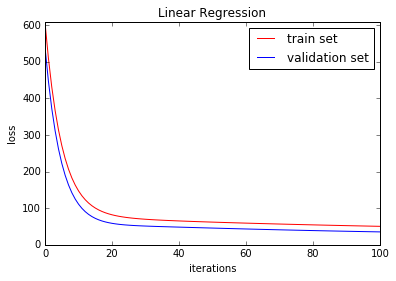

In [7]:
# 画图
plt.plot(train_loss_log,'r', label='train set')
plt.plot(val_loss_log,'b', label = 'validation set')


plt.legend() # 图例
plt.axis([0,100,0,610])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('Linear Regression')
plt.show()